In [1]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../time-alive_*.csv')]
data = pd.concat(frames, ignore_index=True)
data['Coding'] = list(zip(data['fragment_n'], data['fragment_k']))
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,alive_count,Coding
0,4,100000,43200,0.33,1,1,1,80,32,0,0,0,0,1,49,"(80, 32)"
1,4,100000,43200,0.33,1,1,1,100,32,0,0,0,0,1,64,"(100, 32)"
2,4,100000,129600,0.33,1,1,1,80,32,0,0,0,0,5,50,"(80, 32)"
3,4,100000,129600,0.33,1,1,1,100,32,0,0,0,0,3,65,"(100, 32)"
4,4,100000,216000,0.33,1,1,1,80,32,0,0,0,0,9,48,"(80, 32)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7297,4,100000,315057600,0.33,1,1,1,80,32,0,0,0,0,9542,51,"(80, 32)"
7298,4,100000,315144000,0.33,1,1,1,80,32,0,0,0,0,9544,52,"(80, 32)"
7299,4,100000,315230400,0.33,1,1,1,80,32,0,0,0,0,9546,53,"(80, 32)"
7300,4,100000,315316800,0.33,1,1,1,80,32,0,0,0,0,9550,55,"(80, 32)"


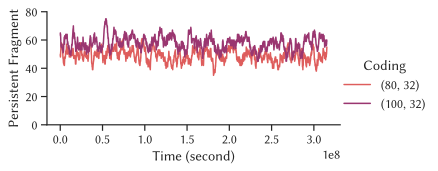

In [2]:
# palette = sns.color_palette('flare', n_colors=5)
sns.relplot(data=data, 
    kind="line",
    x="duration", y="alive_count", hue="Coding", 
    palette='flare',
    height=2.56, aspect=2.) \
.set_xlabels("Time (second)") \
.set_ylabels("Persistent Fragment") \
.set(ylim=(0, 80)) \
.savefig("../time-alive.pdf")